In [75]:
import pandas as pd
import numpy as np
import plotly
# import vincent
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
import json

with open('transactions.json') as json_file:
    data = json.load(json_file)
    data = data['transactions']
    result = pd.DataFrame.from_dict(data).T
    result.index = result.index.astype(int)
    result['amount'] = result['amount'].astype(int)
    result['passport'] = result['passport'].astype(str)
    result['date'] = pd.to_datetime(result['date'], format='%Y-%m-%dT%H:%M:%S')
    result['account_valid_to'] = pd.to_datetime(result['account_valid_to'], format='%Y-%m-%d')
    result['date_of_birth'] = pd.to_datetime(result['date_of_birth'], format='%Y-%m-%d')
    result['passport_valid_to'] = pd.to_datetime(result['passport_valid_to'], format='%Y-%m-%d')
    data = result

In [77]:
d = {'Отказ': False, 'Успешно': True}
data['oper_result'] = data['oper_result'].map(d)
data.head()
data.head()

,date,card,account,account_valid_to,client,last_name,first_name,patronymic,date_of_birth,passport,passport_valid_to,phone,oper_type,amount,oper_result,terminal,terminal_type,city,address
459270924,2020-05-01 00:00:29,59649132026167121328,40817810000001139973,2036-01-16,3-95179,Мисик,Сергей,Николаевич,1938-06-25,7076445954,2022-11-09,+79497481039,Пополнение,31576,Отказ,POS43792,POS,Славянск-на-Кубани,"Славянск-на-Кубани, ул. Клецкая, д. 86"
459270943,2020-05-01 00:02:46,54236863445669263724,40817810000006468175,2033-11-15,8-33140,Ачентов,Антон,Дмитриевич,1960-08-04,6403074379,2030-09-13,+79458324907,Пополнение,60041,Отказ,POS75616,POS,Пустошка,"Пустошка, ул. Цюрупинская, д. 78"
459270968,2020-05-01 00:05:14,45930894029725313464,40817810000009142118,2029-03-18,4-72043,Гуляков,Евгений,Константинович,1989-08-15,3354134791,2021-06-24,+79953939977,Снятие,18474,Успешно,POS28311,POS,Петровск-Забайкальский,"Петровск-Забайкальский, ул. Тагильская, д. 38"
459271057,2020-05-01 00:07:05,47550893546403715714,40817810000005559732,2028-04-01,1-85045,Гуляков,Кирилл,Петрович,1996-09-18,4783507057,2023-01-08,+79698158422,Пополнение,915,Успешно,ATM39555,ATM,Краснослободск,"Краснослободск, ул. Фогеля, д. 20"
459271064,2020-05-01 00:08:27,53036257457049008830,40817810000007495265,2037-10-26,5-77607,Мисик,Сергей,Олегович,1992-05-08,3195562178,2032-09-27,+79181011177,Оплата,75843,Отказ,ATM16730,ATM,Черкесск,"Черкесск, ул. Гинтовта, д. 56"


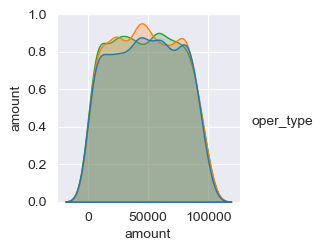

In [78]:
sns.pairplot(data[['amount','terminal_type','oper_type']],
             hue= 'oper_type')
plt.show()

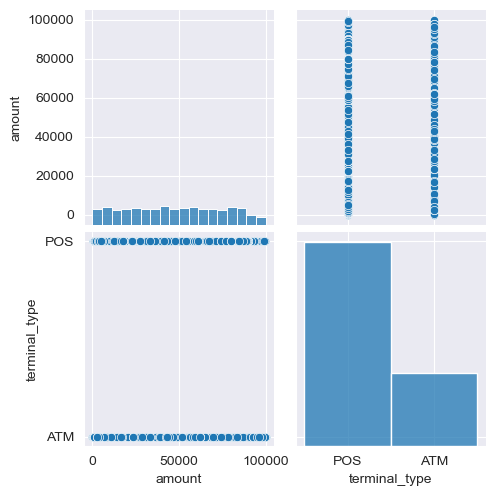

In [79]:
g = sns.pairplot(data, vars=['amount', 'terminal_type'])
plt.show()

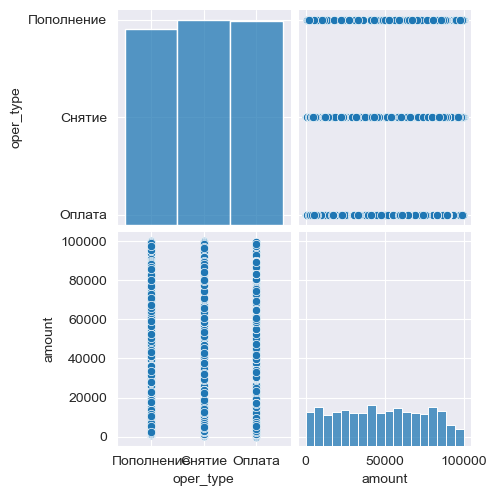

In [80]:
g = sns.pairplot(data, vars=[ 'oper_type', 'amount'])
plt.show()

In [81]:
gr = data.merge(data.groupby(['account'])['amount'].mean(), how='left', on='account')

In [130]:
gr[(gr['phone'] == '+71750428911')]

,date,card,account,account_valid_to,client,last_name,first_name,patronymic,date_of_birth,passport,passport_valid_to,phone,oper_type,amount_x,oper_result,terminal,terminal_type,city,address,amount_y
2480,2020-05-04 00:21:31,40686572625455850392,40817810000009993404,2014-01-17,9-67751,Собин,Фидель,Плескач,1993-05-30,7819983204,2031-07-08,+71750428911,Пополнение,21697,Отказ,POS43792,POS,Уссурийск,"Уссурийск, ул. Остапа Вишний, д. 37",21697.0
2481,2020-05-04 00:22:39,47858653472118884322,40817810000009993405,2013-12-02,9-67751,Собин,Фидель,Плескач,1993-05-30,7819983204,2024-02-18,+71750428911,Снятие,51316,Отказ,POS43792,POS,Уссурийск,"Уссурийск, ул. Остапа Вишний, д. 37",51316.0
2482,2020-05-04 00:24:14,42965043000324495343,40817810000009993406,2013-07-15,9-67751,Собин,Фидель,Плескач,1993-05-30,7819983204,2030-09-19,+71750428911,Оплата,79455,Отказ,POS43792,POS,Уссурийск,"Уссурийск, ул. Остапа Вишний, д. 37",79455.0


In [126]:
gr.head(1000)

,date,card,account,account_valid_to,client,last_name,first_name,patronymic,date_of_birth,passport,passport_valid_to,phone,oper_type,amount_x,oper_result,terminal,terminal_type,city,address,amount_y
0,2020-05-01 00:00:29,59649132026167121328,40817810000001139973,2036-01-16,3-95179,Мисик,Сергей,Николаевич,1938-06-25,7076445954,2022-11-09,+79497481039,Пополнение,31576,Отказ,POS43792,POS,Славянск-на-Кубани,"Славянск-на-Кубани, ул. Клецкая, д. 86",31576.0
1,2020-05-01 00:02:46,54236863445669263724,40817810000006468175,2033-11-15,8-33140,Ачентов,Антон,Дмитриевич,1960-08-04,6403074379,2030-09-13,+79458324907,Пополнение,60041,Отказ,POS75616,POS,Пустошка,"Пустошка, ул. Цюрупинская, д. 78",60041.0
2,2020-05-01 00:05:14,45930894029725313464,40817810000009142118,2029-03-18,4-72043,Гуляков,Евгений,Константинович,1989-08-15,3354134791,2021-06-24,+79953939977,Снятие,18474,Успешно,POS28311,POS,Петровск-Забайкальский,"Петровск-Забайкальский, ул. Тагильская, д. 38",18474.0
3,2020-05-01 00:07:05,47550893546403715714,40817810000005559732,2028-04-01,1-85045,Гуляков,Кирилл,Петрович,1996-09-18,4783507057,2023-01-08,+79698158422,Пополнение,915,Успешно,ATM39555,ATM,Краснослободск,"Краснослободск, ул. Фогеля, д. 20",915.0
4,2020-05-01 00:08:27,53036257457049008830,40817810000007495265,2037-10-26,5-77607,Мисик,Сергей,Олегович,1992-05-08,3195562178,2032-09-27,+79181011177,Оплата,75843,Отказ,ATM16730,ATM,Черкесск,"Черкесск, ул. Гинтовта, д. 56",75843.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020-05-02 05:30:44,58200713408601178229,40817810000004237306,2023-10-02,1-89825,Юнцов,Кирилл,Кириллович,1971-07-05,1952408369,2023-08-04,+79207942259,Снятие,42554,Успешно,ATM54985,ATM,Судогда,"Судогда, ул. Глаголева, д. 36",42554.0
996,2020-05-02 05:31:35,47526850613023832453,40817810000004102211,2038-04-07,5-77607,Мисик,Сергей,Олегович,1992-05-08,3195562178,2032-09-27,+79181011177,Оплата,28902,Успешно,POS27110,POS,Белокуриха,"Белокуриха, ул. Моторная, д. 63",28902.0
997,2020-05-02 05:32:37,42896879542597906629,40817810000002864392,2032-01-26,1-85045,Гуляков,Кирилл,Петрович,1996-09-18,4783507057,2023-01-08,+79698158422,Оплата,53275,Отказ,POS82543,POS,Белая Калитва,"Белая Калитва, ул. Шишковская, д. 46",53275.0
998,2020-05-02 05:34:18,44057187675519201885,40817810000006639489,2034-11-06,2-61884,Гуляков,Василий,Васильевич,1997-02-24,4581135200,2024-11-26,+79497212935,Пополнение,43011,Отказ,POS71096,POS,Михайловка,"Михайловка, ул. Кременчугская, д. 49",43011.0


In [133]:
import re
match = re.fullmatch(r'\+79\d{9}', '+79653366322')
print('YES' if match else 'NO')

YES


In [136]:
gr['phone'].str.findall(r'\[?\+79\d{9}\]?', flags=re.IGNORECASE)

0       [+79497481039]
1       [+79458324907]
2       [+79953939977]
3       [+79698158422]
4       [+79181011177]
             ...      
4466                []
4467                []
4468                []
4469                []
4470                []
Name: phone, Length: 4471, dtype: object

In [153]:
data[(data['phone'].str.match(r'\[?\+7\d{10}\]?'))][['phone', 'oper_result']]

,phone,oper_result
459270924,+79497481039,False
459270943,+79458324907,False
459270968,+79953939977,True
459271057,+79698158422,True
459271064,+79181011177,False
...,...,...
459275623,+73497185681,False
459275624,+76101544386,False
459275625,+77469130963,False
459275626,+77469130963,True


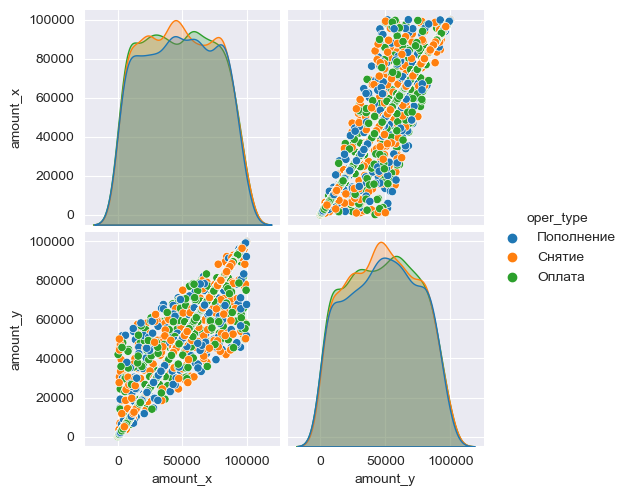

In [83]:
sns.pairplot(gr[['amount_x','amount_y','oper_type']],
             hue= 'oper_type')
plt.show()

In [99]:
day_operations = data[(data['date'].dt.hour >= 6) & (data['date'].dt.hour <= 22)]
day_operations.describe()

,amount
count,3183.000000
mean,47818.024505
std,27612.117284
min,4.000000
25%,24219.500000
50%,47206.000000
75%,71296.500000
max,99980.000000


In [100]:
night_operations = data[(data['date'].dt.hour < 6) | (data['date'].dt.hour > 22)]
night_operations.describe()

,amount
count,1288.000000
mean,47653.042702
std,27598.256896
min,147.000000
25%,23494.750000
50%,47790.000000
75%,70860.500000
max,99922.000000


In [101]:
day_operations.oper_result.value_counts()

True     1929
False    1254
Name: oper_result, dtype: int64

In [102]:
night_operations.oper_result.value_counts()

True     766
False    522
Name: oper_result, dtype: int64

In [118]:
import datetime
print(datetime.date.today().year)

2022


In [119]:
import datetime
old = data[(datetime.date.today().year - data['date_of_birth'].dt.year >= 60)]
adult = data[(datetime.date.today().year - data['date_of_birth'].dt.year > 35) & (datetime.date.today().year - data['date_of_birth'].dt.year < 60)]
young = data[(datetime.date.today().year - data['date_of_birth'].dt.year <= 35)]

In [123]:
old.oper_result.value_counts()[False]/old.oper_result.value_counts()[True]

0.6475343573160873

In [124]:
adult.oper_result.value_counts()[False]/adult.oper_result.value_counts()[True]

0.6908442330558858

In [125]:
young.oper_result.value_counts()[False]/young.oper_result.value_counts()[True]

0.6385737439222042

In [115]:
data.count()

date                 4471
card                 4471
account              4471
account_valid_to     4471
client               4471
last_name            4471
first_name           4471
patronymic           4471
date_of_birth        4471
passport             4471
passport_valid_to    4471
phone                4471
oper_type            4471
amount               4471
oper_result          4471
terminal             4471
terminal_type        4471
city                 4471
address              4471
dtype: int64

In [106]:
old.describe()

,amount
count,2305.000000
mean,48021.261605
std,27826.740612
min,147.000000
25%,23675.000000
50%,47794.000000
75%,71905.000000
max,99922.000000


In [112]:
old[(old['amount'] <= 10000)].oper_result.value_counts()

True     154
False    104
Name: oper_result, dtype: int64

In [154]:
gr[(gr['date'].dt.date > datetime.date.today())]

,date,card,account,account_valid_to,client,last_name,first_name,patronymic,date_of_birth,passport,passport_valid_to,phone,oper_type,amount_x,oper_result,terminal,terminal_type,city,address,amount_y


In [157]:
gr[(data['date_of_birth'].dt.date > datetime.date.today())]

C:\Users\kishi\AppData\Local\Temp\ipykernel_14676\3459025077.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gr[(data['date_of_birth'].dt.date > datetime.date.today())]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [158]:
datetime.date.today()

datetime.date(2022, 10, 17)

In [163]:
data.loc[:,'date_of_birth'].dt.date

459270924    1938-06-25
459270943    1960-08-04
459270968    1989-08-15
459271057    1996-09-18
459271064    1992-05-08
                ...    
459275623    1952-03-13
459275624    1948-11-13
459275625    1970-07-01
459275626    1970-07-01
459275627    1970-07-01
Name: date_of_birth, Length: 4471, dtype: object

In [166]:
data.loc[data['date_of_birth'] > pd.to_datetime(str(datetime.date.today()))]

,date,card,account,account_valid_to,client,last_name,first_name,patronymic,date_of_birth,passport,passport_valid_to,phone,oper_type,amount,oper_result,terminal,terminal_type,city,address


In [167]:
str(datetime.date.today())

'2022-10-17'

In [168]:
pd.to_datetime(str(datetime.date.today()))

Timestamp('2022-10-17 00:00:00')

In [169]:
data.head()

,date,card,account,account_valid_to,client,last_name,first_name,patronymic,date_of_birth,passport,passport_valid_to,phone,oper_type,amount,oper_result,terminal,terminal_type,city,address
459270924,2020-05-01 00:00:29,59649132026167121328,40817810000001139973,2036-01-16,3-95179,Мисик,Сергей,Николаевич,1938-06-25,7076445954,2022-11-09,+79497481039,Пополнение,31576,False,POS43792,POS,Славянск-на-Кубани,"Славянск-на-Кубани, ул. Клецкая, д. 86"
459270943,2020-05-01 00:02:46,54236863445669263724,40817810000006468175,2033-11-15,8-33140,Ачентов,Антон,Дмитриевич,1960-08-04,6403074379,2030-09-13,+79458324907,Пополнение,60041,False,POS75616,POS,Пустошка,"Пустошка, ул. Цюрупинская, д. 78"
459270968,2020-05-01 00:05:14,45930894029725313464,40817810000009142118,2029-03-18,4-72043,Гуляков,Евгений,Константинович,1989-08-15,3354134791,2021-06-24,+79953939977,Снятие,18474,True,POS28311,POS,Петровск-Забайкальский,"Петровск-Забайкальский, ул. Тагильская, д. 38"
459271057,2020-05-01 00:07:05,47550893546403715714,40817810000005559732,2028-04-01,1-85045,Гуляков,Кирилл,Петрович,1996-09-18,4783507057,2023-01-08,+79698158422,Пополнение,915,True,ATM39555,ATM,Краснослободск,"Краснослободск, ул. Фогеля, д. 20"
459271064,2020-05-01 00:08:27,53036257457049008830,40817810000007495265,2037-10-26,5-77607,Мисик,Сергей,Олегович,1992-05-08,3195562178,2032-09-27,+79181011177,Оплата,75843,False,ATM16730,ATM,Черкесск,"Черкесск, ул. Гинтовта, д. 56"
